In [1]:
import numpy as np
import scipy.stats as st
from astropy.io import fits,ascii
from astropy.time import Time
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('font', family='serif')

import palettable
#install this package from here: https://jiffyclub.github.io/palettable/cubehelix/

%matplotlib inline

In [2]:
a_wv, a_pw=np.loadtxt('a_spec.txt', unpack=True)
b_wv, b_pw=np.loadtxt('b_spec.txt', unpack=True)
c_wv, c_pw=np.loadtxt('c_spec.txt', unpack=True)
wv_510, pw_510=np.loadtxt('M11_510_final.txt', unpack=True)
f_wv, f_pw=np.loadtxt('M11_500_final.txt', unpack=True)
t_wv, t_pw=np.loadtxt('M11_490_final.txt', unpack=True)
a_pw[np.where(a_pw>900)]=1000
a_pw[np.where(a_pw<100)]=100

b_pw[np.where(b_pw>1000)]=1000
b_pw[np.where(b_pw<100)]=100

b_pw[np.where((b_wv>4490)&(b_wv<4495))]=300
a_pw[np.where((a_wv>4490)&(a_wv<4495))]=300

c_pw[np.where(c_pw>2000)]=1000
c_pw[np.where(c_pw<100)]=100

c_pw[np.where((c_wv>4490)&(c_wv<4495))]=300



#f_pw[np.where(f_pw>2000)]=1000
#f_pw[np.where(f_pw<100)]=100

#f_pw[np.where((f_wv>4490)&(f_wv<4495))]=300

In [8]:
plt.figure(figsize=(12,6))
#plt.plot(a_wv, a_pw, color=palettable.cubehelix.cubehelix3_16.mpl_colors[12], label='A')
#plt.plot(b_wv, b_pw, color=palettable.cubehelix.cubehelix3_16.mpl_colors[2], label='B')
#plt.plot(c_wv, c_pw, color=palettable.cubehelix.cubehelix3_16.mpl_colors[6], label='C')
#plt.plot(wv_510, pw_510, '-',color=palettable.cubehelix.cubehelix3_16.mpl_colors[4])
#plt.plot(t_wv, t_pw, '.-', color=palettable.cubehelix.cubehelix3_16.mpl_colors[6], alpha=0.5)

plt.plot(f_wv, f_pw/1.9, color='k', alpha=0.75)
#plt.title('Spectra in M11 data')
plt.xlabel('Wavelength (Angstroms)', fontsize=28)
plt.ylabel('Intensity (Counts)', fontsize=28)
#plt.yscale('log')
plt.ylim(-20, 250)
#plt.axvline(x=5575, color='k', zorder=0)
plt.xlim(4600, 5570)
#formatting for tick marks
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=26)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right='on',top='on')
plt.savefig('M11.pdf', bbox_inches = 'tight',
    pad_inches = 0)

#plt.axvline(x=5030)

In [4]:
c1=fits.Column(name='wavelength', array=f_wv, format='D')
c2=fits.Column(name='counts', array=f_pw, format='D')

t = fits.BinTableHDU.from_columns([c1, c2])

t.writeto('m11.fits')


In [122]:
v=660.0
c=300000.

In [123]:
a1=(1-(v/c))

In [124]:

a2=(1+(v/c))

In [125]:
z2=a2/a1
z=np.sqrt(z2)

5018.027543641349

In [163]:
def linefit(inwave, influx, inname, ntrials=50,range1=[4800, 4850], range2=[5100, 5150], linerange=[5007, 5017], d_reg=20, DoPlot=True):
    
    wavelength=inwave
    flux=influx


    allfluxval=[()]
    
    
    for i in range(0,ntrials):
        
        #setting ranges for where continuum is featureless above and below emission line
        lowlim=range1[0]
        uplim=range1[1]
        
        lowlim2=range2[0]
        uplim2=range2[1]

        #setting range for emission line
        line1=linerange[0]
        line2=linerange[1]
        
        ##picking a random value to calculate continuum flux from
        ##let's randomly resample %d_reg angstrom size bins 
        cont_1=np.random.randint(lowlim, uplim, 1 )
        cont_2=cont_1+d_reg
        
        cont_3=np.random.randint(lowlim2, uplim2, 1)
        cont_4=cont_3+d_reg
    

        ##setting two regions to calculate the average continuum flux
        reg_1=np.where((wavelength>cont_1)&(wavelength<cont_2))
        reg_2=np.where((wavelength>cont_3)&(wavelength<cont_4))
        
        #line region
        reg_line=np.where((wavelength>line1)&(wavelength<line2))
        
        #continuum flux before and after emission line
        cont2=np.average(flux[reg_2])
        cont1=np.average(flux[reg_1])
       
    
        ##fitting a straight line to the region with line emission
        x1=cont_1+(d_reg/2)
        x2=cont_3+(d_reg/2)
        y1=cont1
        y2=cont2
        m = (y2-y1)/(x2-x1)
        b=y2-(m*x2)
        xnew=wavelength[reg_line]
        ynew=m*xnew+b
        
        
        ##setting the plot ylimits
        offset=(np.min(flux[reg_line])+np.min(flux[reg_line]))/2
        
        pltlowlim=np.min(flux[reg_line])-(offset/2)
        plthiglim=np.min(flux[reg_line])+(1.5*offset)
        pltxlowlim=x1-275
        pltxhiglim=x2+275
        
 
        if DoPlot:
            ##!!only make one plot!!
            if np.size(allfluxval)<1:

                plt.figure(figsize=(10,8))
                plt.plot(wavelength, flux, '--', lw=2, color='peru', zorder=10, label=inname)
                
                ##plotting all the various regions
                plt.axvline(x=line1, color='b', lw=2)
                plt.axvline(x=line2, color='b', lw=2)
    

                plt.axvline(x=cont_1, color='c', lw=2)
                plt.axvline(x=cont_2, color='c', lw=2)
                plt.axvspan(cont_3, cont_4, color='c', alpha=0.25)
                plt.axvline(x=cont_3, color='c', lw=2)
                plt.axvline(x=cont_4, color='c', lw=2)
                plt.axvspan(cont_1, cont_2, color='c', alpha=0.25, label='randomly sampled region')
                plt.axvspan(line1, line2, color='m', alpha=0.25, label='emission line region')
                
                
                plt.axvspan(lowlim, uplim+d_reg, color='k', alpha=0.15)

                plt.axvspan(lowlim2, uplim2+d_reg, color='k', alpha=0.15, label='featureless region')

                plt.plot(xnew, ynew,  color='b', zorder=20, lw=4, label='best fit line' )
                plt.axvline(x=lowlim, color='k', linestyle='--', lw=2)
                plt.axvline(x=uplim+d_reg, color='k', linestyle='--', lw=2)
                plt.axvline(x=uplim2+d_reg, color='k',linestyle='--', lw=2)
                plt.axvline(x=lowlim2, color='k', linestyle='--', lw=2)
                plt.axhline(y=cont1, color='m', lw=2)
                plt.axhline(y=cont2, color='m', lw=2)
                plt.axhspan(cont1, cont2, color='m', alpha=0.25, label='fit continuum region')
                plt.xlim(4600,5400)
                #plt.xlim(pltxlowlim, pltxhiglim)
                #plt.ylim(pltlowlim, plthiglim)
                plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                fname='cont_line_%s.pdf' %inname
                plt.xlabel('Wavelength (Angstrom)')
                plt.ylabel('Flux (Arbitrary Units)')
                plt.savefig(fname)

        ##calculating equivalent width
        d_lambda= wavelength[1]-wavelength[0]
        eq_wid=np.sum(1-(flux[reg_line]/ynew))*d_lambda
        
        ##gathering up all the trials together
        if np.size(allfluxval)<1:
            allfluxval=eq_wid
        else:
            allfluxval=np.hstack((allfluxval, eq_wid))
            
    
  
    ##taking average and standard deviation
    avg=np.average(allfluxval)
    std=np.std(allfluxval)
    
    
    
    return avg, std


In [164]:
eq_wid_mag08_oii, err_srmag08_oii=linefit(inwave=f_wv, influx=f_pw, ntrials=50, inname='M11TEST',range1=[4600, 4630], range2=[5120, 5150], linerange=[5008, 5028], )

In [165]:
eq_wid_mag08_oii, err_srmag08_oii

(-0.08374188184215527, 0.3625517578252932)

In [64]:
(-0.08354271448249977, 0.07589012328777973)

(-0.1169151894176038, 0.283425851048414)

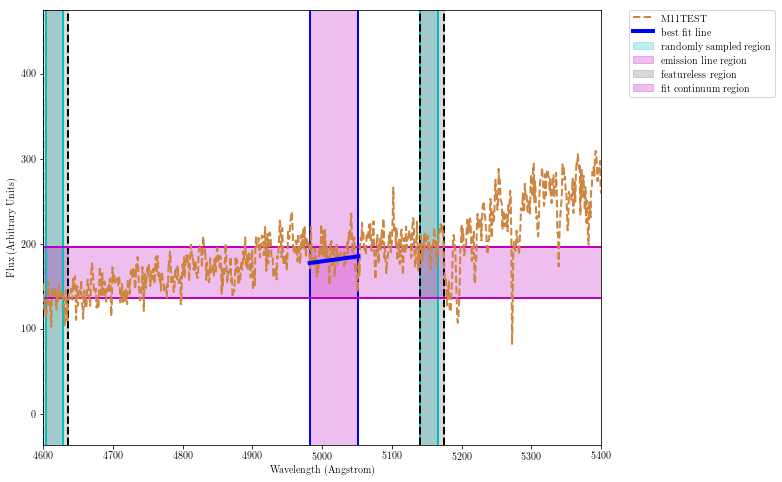

In [119]:
eq_wid_mag08_oii, err_srmag08_oii=linefit(inwave=f_wv, influx=f_pw, inname='M11TEST',range1=[4600, 4610], range2=[5140, 5150], linerange=[5012-30, 5022+30], )

In [148]:
eq_wid_mag08_oii, err_srmag08_oii

(-0.027661694956953302, 0.17864975171273745)

In [121]:
-2.3118008189452115/6.

-0.3853001364908686